In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt

import warnings
import imblearn

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('GT2_NEW.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'apex', 'fqdns',
       'firstseen-pdns', 'lastseen-pdns', 'days count-pdns', 'query count',
       'name servers', 'ns domain', 'soa_domains_nos', 'soa_domain',
       'suspicious_tld', 'length', 'entropy', 'fake_tld', 'brand',
       'pop_keywords', 'similar', 'is_idn', 'minus', 'num_subdomains',
       'Number_of_total_Scans', 'Number_of_Benign_Scans',
       'apex_marked_malicious', 'domain_marked_malicious',
       'sibling_domain_marked_malicious', 'Number_of_query_parameters',
       'Positive_count', 'Response_code', 'URL_after_redirects', 'resolution',
       'rlength', 'url_length',
       'number of days between firstseen and lastseen', 'Label',
       'Alexa rank (avg)', 'url', 'mean_urls_per_subdomain',
       'mean_path_depth_per_subdomain',
       'mean_query_parameters_per_subdomain_paths',
       'mean_path_length_per_subdomain_paths',
       'mean_number_of_popular_keywords_per_subdomain_paths',
       '#query_par

In [5]:
print('Attacker-Created Compromised Data set 2')
print('Size of the data set {}'.format(df.shape[0]))
print('Size of the Attacker-Created set {}'.format(df.loc[df.Label=='AC'].shape[0]))
print('Size of the Compromised set {}'.format(df.loc[df.Label=='COMP'].shape[0]))

Attacker-Created Compromised Data set 2
Size of the data set 1418
Size of the Attacker-Created set 833
Size of the Compromised set 585


In [6]:
df = df[['apex', 'fqdns',
       'firstseen-pdns', 'lastseen-pdns', 'days count-pdns', 'query count',
       'name servers', 'ns domain', 'soa_domains_nos', 'soa_domain',
       'suspicious_tld', 'length', 'entropy', 'fake_tld', 'brand',
       'pop_keywords', 'similar', 'minus', 'num_subdomains', 'Label',
       'Number_of_total_Scans', 'Number_of_Benign_Scans',
       'apex_marked_malicious', 'domain_marked_malicious',
       'sibling_domain_marked_malicious', 'Number_of_query_parameters',
       'Positive_count', 'Response_code', 'URL_after_redirects', 'resolution',
       'rlength', 'url_length',
       'number of days between firstseen and lastseen', 'Alexa rank (avg)',
       'url', '#query_parameters', '#dots_in_path', '#brands_in_path',
       '#similar_keywords_in_path', '#suspicious_keywords_in_path']]

In [7]:
data = []
for index, row in df.iterrows():
    try:
        row.rlength = float(row.rlength)
        data.append(row)
    except:
        row.rlength = -1
        data.append(row)
    try:
        row.url_length  = float(row.url_length)
    except:
        row.url_length  = float(len(row.fqdns))
data = pd.DataFrame(data)        

In [8]:
data.dtypes

apex                                              object
fqdns                                             object
firstseen-pdns                                    object
lastseen-pdns                                     object
days count-pdns                                    int64
query count                                        int64
name servers                                       int64
ns domain                                         object
soa_domains_nos                                    int64
soa_domain                                        object
suspicious_tld                                    object
length                                             int64
entropy                                          float64
fake_tld                                           int64
brand                                              int64
pop_keywords                                       int64
similar                                            int64
minus                          

In [9]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['suspicious_tld'] = label_encoder.fit_transform(data['suspicious_tld'])
data['Label'] = label_encoder.fit_transform(data['Label'])
data['ns domain'] = label_encoder.fit_transform(data['ns domain'])
data['soa_domain'] = label_encoder.fit_transform(data['soa_domain'])

data['Response_code'] = label_encoder.fit_transform(data['Response_code'])
data['URL_after_redirects'] = label_encoder.fit_transform(data['URL_after_redirects'])
# data['is_idn'] = label_encoder.fit_transform(data['is_idn'])

In [10]:
data['days count-pdns'] = data['days count-pdns']/( data['days count-pdns'].max()-data['days count-pdns'].min())
data['number of days between firstseen and lastseen'] = data['number of days between firstseen and lastseen']/(data['number of days between firstseen and lastseen'].max()-data['number of days between firstseen and lastseen'].min())

In [11]:
df = data

In [12]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.1)

In [13]:
print('Full data set\nNumber of Attacker Created\t{}\nNumber of Compromised\t{}\n'.format(df.loc[df.Label==0].shape[0], df.loc[df.Label==1].shape[0]))
print('Train\nNumber of Attacker Created\t{}\nNumber of Compromised\t{}\n'.format(train.loc[train.Label==0].shape[0], train.loc[train.Label==1].shape[0]))
print('Test\nNumber of Attacker Created\t{}\nNumber of Compromised\t{}\n'.format(test.loc[test.Label==0].shape[0], test.loc[test.Label==1].shape[0]))

Full data set
Number of Attacker Created	833
Number of Compromised	585

Train
Number of Attacker Created	747
Number of Compromised	529

Test
Number of Attacker Created	86
Number of Compromised	56



In [14]:
oversample = imblearn.over_sampling.SMOTE(k_neighbors=20)
X_train, Y_train = oversample.fit_resample(train[[
        'days count-pdns', 'query count',
       'name servers', 'ns domain', 'soa_domains_nos', 'soa_domain',
       'suspicious_tld', 'length', 'entropy', 'fake_tld', 'brand',
       'pop_keywords', 'similar' ,'minus', 'num_subdomains',
       'Number_of_total_Scans', 'Number_of_Benign_Scans',
       'apex_marked_malicious', 'domain_marked_malicious',
       'sibling_domain_marked_malicious', 'Number_of_query_parameters',
       'Positive_count', 'Response_code', 'URL_after_redirects',
       'rlength', 'url_length',
       'number of days between firstseen and lastseen', 'Alexa rank (avg)',
       '#query_parameters', '#dots_in_path', '#brands_in_path',
       '#similar_keywords_in_path', '#suspicious_keywords_in_path'
]], train.Label)

In [15]:
 X_test  = test[[
        'days count-pdns', 'query count',
       'name servers', 'ns domain', 'soa_domains_nos', 'soa_domain',
       'suspicious_tld', 'length', 'entropy', 'fake_tld', 'brand',
       'pop_keywords', 'similar' ,'minus', 'num_subdomains',
       'Number_of_total_Scans', 'Number_of_Benign_Scans',
       'apex_marked_malicious', 'domain_marked_malicious',
       'sibling_domain_marked_malicious', 'Number_of_query_parameters',
       'Positive_count', 'Response_code', 'URL_after_redirects',
       'rlength', 'url_length',
       'number of days between firstseen and lastseen', 'Alexa rank (avg)',
       '#query_parameters', '#dots_in_path', '#brands_in_path',
       '#similar_keywords_in_path', '#suspicious_keywords_in_path'
]]
Y_test = test.Label

In [31]:
classifiers=[['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Support Vector Classification :',SVC()],
       ['RandomForestClassifier : ',RandomForestClassifier()],      
      ]
cla_pred=[]
for name,model in classifiers:
    model=model
    model.fit(X_train,Y_train)
    predictions = model.predict(X_test)
    cla_pred.append(accuracy_score(Y_test,predictions))
    print(name,accuracy_score(Y_test,predictions),' precision : ',precision_score(Y_test,predictions),' recall : ',recall_score(Y_test,predictions))

Logistic Regression : 0.8591549295774648  precision :  0.8461538461538461  recall :  0.7857142857142857
Decision Tree Classification : 0.9647887323943662  precision :  0.9636363636363636  recall :  0.9464285714285714
Gradient Boosting Classification : 0.9647887323943662  precision :  1.0  recall :  0.9107142857142857
Ada Boosting Classification : 0.9647887323943662  precision :  0.9636363636363636  recall :  0.9464285714285714
Extra Tree Classification : 0.9577464788732394  precision :  0.9807692307692307  recall :  0.9107142857142857
K-Neighbors Classification : 0.7746478873239436  precision :  0.7  recall :  0.75
Support Vector Classification : 0.7535211267605634  precision :  0.7441860465116279  recall :  0.5714285714285714
RandomForestClassifier :  0.9647887323943662  precision :  1.0  recall :  0.9107142857142857


In [32]:
X_trainLR1, X_testLR1, Y_trainLR1, Y_testLR1 = train_test_split(data[['Alexa rank (avg)']
], data.Label, test_size = 0.20, random_state = 0)

from sklearn.linear_model import LogisticRegression

model1=LogisticRegression()
model1.fit(X_trainLR1,Y_trainLR1)
predictionsLR1 = model1.predict(X_testLR1)
print('GT 1 LogisticRegression - Only Alexa',accuracy_score(Y_testLR1,predictionsLR1),' precision : ',precision_score(Y_testLR1,predictionsLR1),' recall : ',recall_score(Y_testLR1,predictionsLR1))


X_trainLR2, X_testLR2, Y_trainLR2, Y_testLR2 = train_test_split(data[['days count-pdns']
], data.Label, test_size = 0.20, random_state = 0)


model2=LogisticRegression()
model2.fit(X_trainLR2,Y_trainLR2)
predictionsLR2 = model2.predict(X_testLR2)
print('GT 1 LogisticRegression - Only PDNS',accuracy_score(Y_testLR2,predictionsLR2),' precision : ',precision_score(Y_testLR2,predictionsLR2),' recall : ',recall_score(Y_testLR2,predictionsLR2))

X_trainLR3, X_testLR3, Y_trainLR3, Y_testLR3 = train_test_split(data[['Alexa rank (avg)', 'days count-pdns']
], data.Label, test_size = 0.20, random_state = 0)


model3=LogisticRegression()
model3.fit(X_trainLR3,Y_trainLR3)
predictionsLR3 = model3.predict(X_testLR3)
print('GT 1 LogisticRegression - Both PDNS & Alexa',accuracy_score(Y_testLR3,predictionsLR3),' precision : ',precision_score(Y_testLR3,predictionsLR3),' recall : ',recall_score(Y_testLR3,predictionsLR3))

GT 1 LogisticRegression - Only Alexa 0.7535211267605634  precision :  0.9333333333333333  recall :  0.45901639344262296
GT 1 LogisticRegression - Only PDNS 0.5704225352112676  precision :  0.0  recall :  0.0
GT 1 LogisticRegression - Both PDNS & Alexa 0.7535211267605634  precision :  0.9333333333333333  recall :  0.45901639344262296


In [33]:
RFC = RandomForestClassifier()

In [34]:
from sklearn.model_selection import GridSearchCV

n_estimators = list(range(1,1001,100))
max_depth = list(range(1,1001,100))

hyperparameters = dict(max_depth=max_depth, n_estimators=n_estimators)
h_rfmodel = GridSearchCV(RFC, hyperparameters, cv=5,n_jobs=100, verbose=1)

best_logmodel=h_rfmodel.fit(X_train,Y_train)

n_estimators = best_logmodel.best_estimator_.get_params()['n_estimators']
max_depth = best_logmodel.best_estimator_.get_params()['max_depth']

print('Best Estimators:', n_estimators)
print('Best Max Depth:', max_depth)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=100)]: Using backend LokyBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done 250 tasks      | elapsed:   13.9s
[Parallel(n_jobs=100)]: Done 500 out of 500 | elapsed:   22.1s finished


Best Estimators: 801
Best Max Depth: 301


In [35]:
RFC = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators)
RFC.fit(X_train,Y_train)
predictions_RFC = RFC.predict(X_test)

In [36]:
print('Random Forest',accuracy_score(Y_test,predictions_RFC),' precision : ',precision_score(Y_test,predictions_RFC),' recall : ',recall_score(Y_test,predictions_RFC),'\n')
print(classification_report(Y_test,predictions_RFC))

Random Forest 0.9647887323943662  precision :  1.0  recall :  0.9107142857142857 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        86
           1       1.00      0.91      0.95        56

    accuracy                           0.96       142
   macro avg       0.97      0.96      0.96       142
weighted avg       0.97      0.96      0.96       142



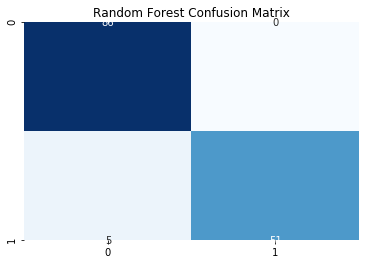

In [37]:
plt.title("Random Forest Confusion Matrix")
sns.heatmap(confusion_matrix(Y_test, predictions_RFC),annot=True,cmap="Blues",fmt="g",cbar=False)
# plt.savefig('attacker_created_compromised_classifier_confusion_matrix_gt1.png')
plt.show()

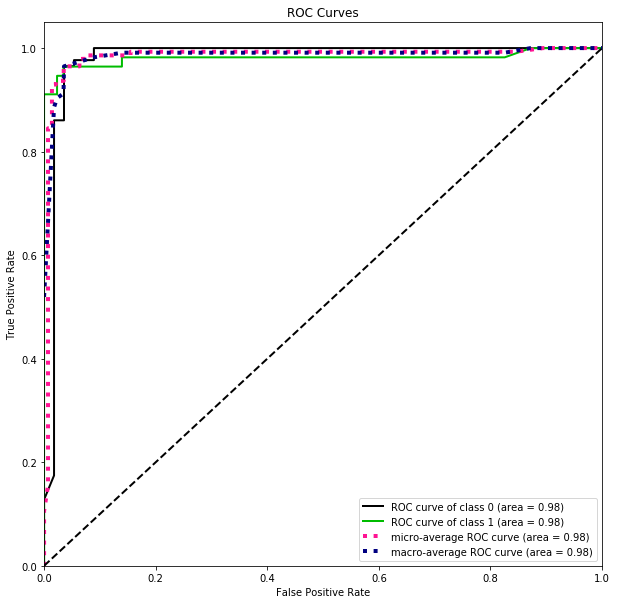

In [38]:
false_positive_rate_RFC, true_positive_rate_RFC, thresholds_RFC = roc_curve(Y_test,RFC.predict_proba(X_test)[:,1])
skplt.metrics.plot_roc_curve(Y_test.values,RFC.predict_proba(X_test), figsize = (10,10))
# plt.savefig('attacker_created_compromised_classifier_roc_gt1.png')
plt.show()

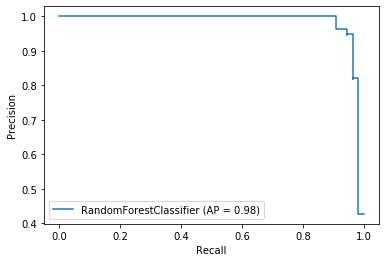

In [39]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(RFC, X_test, Y_test)
# plt.savefig('attacker_created_compromised_classifier_precision_recall_curve_gt1.png')

Feature ranking:
1. feature 0 - days count-pdns (0.1523847585156476)
2. feature 17 - apex_marked_malicious (0.1015124396048556)
3. feature 15 - Number_of_total_Scans (0.09902903524687076)
4. feature 30 - #brands_in_path (0.09043908156391312)
5. feature 18 - domain_marked_malicious (0.08374214853111492)
6. feature 10 - brand (0.07967540062191444)
7. feature 26 - number of days between firstseen and lastseen (0.07047605285119589)
8. feature 27 - Alexa rank (avg) (0.06433911516358322)
9. feature 12 - similar (0.05411627253107642)
10. feature 6 - suspicious_tld (0.03275353622809202)
11. feature 24 - rlength (0.021628006700592246)
12. feature 8 - entropy (0.021158111075018134)
13. feature 25 - url_length (0.017114406982894178)
14. feature 7 - length (0.014541175238283854)
15. feature 21 - Positive_count (0.012863037785022196)
16. feature 13 - minus (0.011487167873377316)
17. feature 1 - query count (0.010990555548701814)
18. feature 22 - Response_code (0.010701162831456461)
19. feature 4 - 

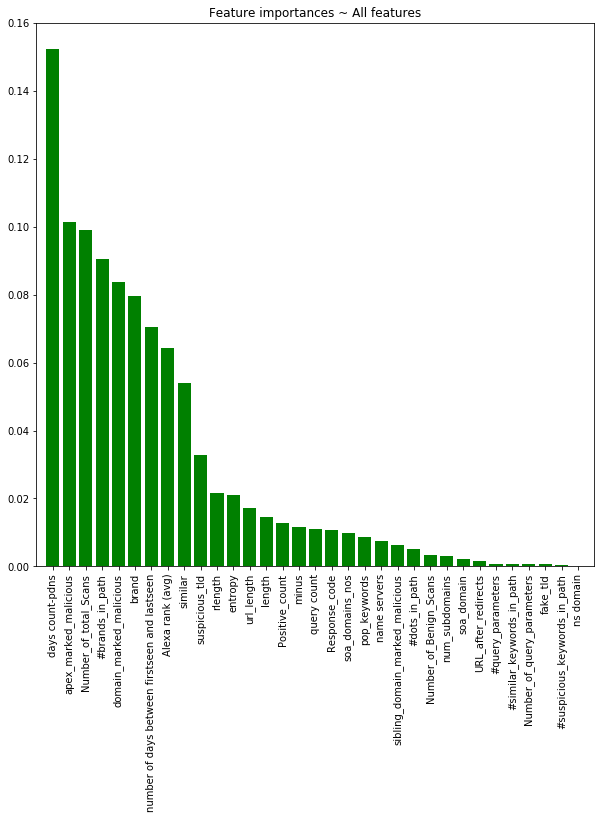

In [40]:
import numpy as np
importances = RFC.feature_importances_
std = np.std([RFC.feature_importances_ for tree in RFC.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
Feature = [
        'days count-pdns', 'query count',
       'name servers', 'ns domain', 'soa_domains_nos', 'soa_domain',
       'suspicious_tld', 'length', 'entropy', 'fake_tld', 'brand',
       'pop_keywords', 'similar', 'minus', 'num_subdomains',
       'Number_of_total_Scans', 'Number_of_Benign_Scans',
       'apex_marked_malicious', 'domain_marked_malicious',
       'sibling_domain_marked_malicious', 'Number_of_query_parameters',
       'Positive_count', 'Response_code', 'URL_after_redirects',
       'rlength', 'url_length',
       'number of days between firstseen and lastseen', 'Alexa rank (avg)',
       '#query_parameters', '#dots_in_path', '#brands_in_path',
       '#similar_keywords_in_path', '#suspicious_keywords_in_path'
]
for f in range(X_train.shape[1]):
    print("{}. feature {} - {} ({})" .format(f + 1, indices[f], Feature[indices[f]], importances[indices[f]]))
indiceX = [Feature[i] for i in indices]
plt.figure(figsize=(10,10))
plt.title("Feature importances ~ All features")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indiceX, rotation=90)
plt.xlim([-1, X_train.shape[1]])
# plt.savefig('attacker_created_compromised_classifier_feature_importances_gt1.png')
plt.show()

In [41]:
import pickle
# pickle.dump(RFC,open('attacker_created_compromised_classifier_rf_gt_1.pickle','wb'))